In [39]:
import time
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
crimes_df = pd.read_csv('NYPD_Crime_2017_CLEAN_FINAL.csv')
crimes_df


,Date,Time,Rounded_time,Offense
0,12/31/2017,22:43:00,23:00:00,DANGEROUS WEAPONS
1,03/17/2017,15:00:00,15:00:00,RAPE
2,12/31/2017,22:40:00,23:00:00,PETIT LARCENY
3,12/31/2017,22:34:00,23:00:00,PETIT LARCENY
4,12/31/2017,14:16:00,14:00:00,HARRASSMENT 2
5,12/31/2017,13:20:00,13:00:00,ASSAULT 3 & RELATED OFFENSES
6,12/31/2017,05:25:00,05:00:00,VEHICLE AND TRAFFIC LAWS
7,12/31/2017,05:20:00,05:00:00,ASSAULT 3 & RELATED OFFENSES
8,12/31/2017,05:20:00,05:00:00,ROBBERY
9,12/31/2017,03:26:00,03:00:00,BURGLARY


In [41]:
# File to Load (Remember to change these)
crime_data_to_load = "NYPD_Crime_2017_CLEAN_FINAL.csv" 

In [42]:
pd.value_counts(crimes_df['Offense'].values, sort=False)


ROBBERY                                 13868
FELONY ASSAULT                          19776
GAMBLING                                  245
DISORDERLY CONDUCT                         28
CRIMINAL MISCHIEF & RELATED OF          47985
FRAUDS                                   2553
ALCOHOLIC BEVERAGE CONTROL LAW            146
PETIT LARCENY OF MOTOR VEHICLE             53
FRAUDULENT ACCOSTING                      186
UNLAWFUL POSS. WEAP. ON SCHOOL              2
OTHER OFFENSES RELATED TO THEF           1486
SEX CRIMES                               5774
OFFENSES AGAINST PUBLIC ADMINI           7914
JOSTLING                                   38
FORGERY                                  5171
ASSAULT 3 & RELATED OFFENSES            51018
INTOXICATED & IMPAIRED DRIVING           5605
MISCELLANEOUS PENAL LAW                 13028
OFFENSES INVOLVING FRAUD                 1150
HOMICIDE-NEGLIGENT-VEHICLE                  3
GRAND LARCENY OF MOTOR VEHICLE           5576
ESCAPE 3                          

In [43]:
def classify_day_part(hour):
    hour = int(hour.split(":")[0])
    if hour > 5 and hour < 8:
        return 'early morning'
    if hour >= 8 and hour < 12:
        return 'late morning'
    if hour >= 12 and hour <= 16:
        return 'early afternoon'
    if hour <= 16 and hour >= 17:
        return 'late afternoon'
    if hour >=17 and hour <= 19:
        return 'evening'
    if hour >= 20 and hour < 23:
        return 'night'
    if hour >= 23 or hour <= 5:
        return 'late night'
    
def h2num(hour):
    return int(hour.split(":")[0])

In [44]:
crimes_df["time of day"] = crimes_df["Rounded_time"].apply(classify_day_part)
crimes_df["hour as num"] = crimes_df["Rounded_time"].apply(h2num)
crimes_df

,Date,Time,Rounded_time,Offense,time of day,hour as num
0,12/31/2017,22:43:00,23:00:00,DANGEROUS WEAPONS,late night,23
1,03/17/2017,15:00:00,15:00:00,RAPE,early afternoon,15
2,12/31/2017,22:40:00,23:00:00,PETIT LARCENY,late night,23
3,12/31/2017,22:34:00,23:00:00,PETIT LARCENY,late night,23
4,12/31/2017,14:16:00,14:00:00,HARRASSMENT 2,early afternoon,14
5,12/31/2017,13:20:00,13:00:00,ASSAULT 3 & RELATED OFFENSES,early afternoon,13
6,12/31/2017,05:25:00,05:00:00,VEHICLE AND TRAFFIC LAWS,late night,5
7,12/31/2017,05:20:00,05:00:00,ASSAULT 3 & RELATED OFFENSES,late night,5
8,12/31/2017,05:20:00,05:00:00,ROBBERY,late night,5
9,12/31/2017,03:26:00,03:00:00,BURGLARY,late night,3


In [45]:
crimes_df[crimes_df["Rounded_time"] == "12:00:00"]

,Date,Time,Rounded_time,Offense,time of day,hour as num
30,12/28/2017,11:50:00,12:00:00,PETIT LARCENY,early afternoon,12
33,12/28/2017,12:00:00,12:00:00,OFF. AGNST PUB ORD SENSBLTY &,early afternoon,12
34,12/26/2017,11:46:00,12:00:00,SEX CRIMES,early afternoon,12
344,12/31/2017,12:30:00,12:00:00,ASSAULT 3 & RELATED OFFENSES,early afternoon,12
345,12/31/2017,12:30:00,12:00:00,HARRASSMENT 2,early afternoon,12
346,12/31/2017,12:30:00,12:00:00,CRIMINAL MISCHIEF & RELATED OF,early afternoon,12
347,12/31/2017,12:30:00,12:00:00,BURGLARY,early afternoon,12
348,12/31/2017,12:30:00,12:00:00,HARRASSMENT 2,early afternoon,12
349,12/31/2017,12:30:00,12:00:00,HARRASSMENT 2,early afternoon,12
350,12/31/2017,12:25:00,12:00:00,HARRASSMENT 2,early afternoon,12


In [46]:
crimes_df.head()


,Date,Time,Rounded_time,Offense,time of day,hour as num
0,12/31/2017,22:43:00,23:00:00,DANGEROUS WEAPONS,late night,23
1,03/17/2017,15:00:00,15:00:00,RAPE,early afternoon,15
2,12/31/2017,22:40:00,23:00:00,PETIT LARCENY,late night,23
3,12/31/2017,22:34:00,23:00:00,PETIT LARCENY,late night,23
4,12/31/2017,14:16:00,14:00:00,HARRASSMENT 2,early afternoon,14


In [47]:
crimes_df.groupby(['Date','Rounded_time','Offense']).count()

Time  time of day  \
Date       Rounded_time Offense                                             
01/02/2017 00:00:00     ARSON                              1            1   
                        ASSAULT 3 & RELATED OFFENSES       8            8   
                        BURGLARY                           1            1   
                        CRIMINAL MISCHIEF & RELATED OF    15           15   
                        DANGEROUS DRUGS                    1            1   
                        FELONY ASSAULT                     2            2   
                        FRAUDS                             1            1   
                        GRAND LARCENY                      4            4   
                        GRAND LARCENY OF MOTOR VEHICLE     1            1   
                        HARRASSMENT 2                      3            3   
                        INTOXICATED & IMPAIRED DRIVING     2            2   
                        OFF. AGNST PUB ORD SENSBLTY &      2            2   
                        OFFENSES AGAINST PUBLIC ADMINI     1            1   
                        OTHER OFFENSES RELATED TO THEF     1            1   
                        PETIT LARCENY                      7            7   
                        ROBBERY                            3            3   
                        SEX CRIMES                         2            2   
                        VEHICLE AND TRAFFIC LAWS           1            1   
           01:00:00     ASSAULT 3 & RELATED OFFENSES       6            6   
                        CRIMINAL MISCHIEF & RELATED OF     4            4   
                        CRIMINAL TRESPASS                  1            1   
                        DANGEROUS DRUGS                    1            1   
                        DANGEROUS WEAPONS                  1            1   
                        FELONY ASSAULT                     1            1   
                        FORGERY                            1            1   
                        HARRASSMENT 2                      4            4   
                        INTOXICATED & IMPAIRED DRIVING     1            1   
                        OFF. AGNST PUB ORD SENSBLTY &      2            2   
                        OFFENSES AGAINST PUBLIC ADMINI     1            1   
                        PETIT LARCENY                      3            3   
...                                                      ...          ...   
12/31/2017 21:00:00     GRAND LARCENY                      1            1   
                        HARRASSMENT 2                      3            3   
                        MISCELLANEOUS PENAL LAW            1            1   
                        OFF. AGNST PUB ORD SENSBLTY &      1            1   
                        OFFENSES INVOLVING FRAUD           2            2   
                        OTHER OFFENSES RELATED TO THEF     2            2   
                        PETIT LARCENY                      2            2   
                        ROBBERY                            3            3   
                        SEX CRIMES                         1            1   
           22:00:00     ASSAULT 3 & RELATED OFFENSES       9            9   
                        CRIMINAL MISCHIEF & RELATED OF     1            1   
                        DANGEROUS DRUGS                    1            1   
                        FELONY ASSAULT                     1            1   
                        HARRASSMENT 2                      3            3   
                        MISCELLANEOUS PENAL LAW            2            2   
                        OFFENSES AGAINST PUBLIC ADMINI     1            1   
                        OFFENSES AGAINST THE PERSON        2            2   
                        OTHER OFFENSES RELATED TO THEF     1            1   
                        PETIT LARCENY                      1            1   
                        ROBBERY                     

In [48]:
under6 = crimes_df[ (crimes_df["hour as num"] < 6 ) ]
sixto12=crimes_df[ (crimes_df["hour as num"] >= 6 )| (crimes_df["hour as num"] >12) ]
twelveto18=crimes_df[ (crimes_df["hour as num"] >= 12 )| (crimes_df["hour as num"] >18) ]
eighteen=crimes_df[ crimes_df["hour as num"] >= 18]
eighteen

,Date,Time,Rounded_time,Offense,time of day,hour as num
0,12/31/2017,22:43:00,23:00:00,DANGEROUS WEAPONS,late night,23
2,12/31/2017,22:40:00,23:00:00,PETIT LARCENY,late night,23
3,12/31/2017,22:34:00,23:00:00,PETIT LARCENY,late night,23
14,12/30/2017,22:55:00,23:00:00,ROBBERY,late night,23
15,12/30/2017,21:30:00,22:00:00,SEX CRIMES,night,22
17,12/30/2017,22:00:00,22:00:00,DANGEROUS DRUGS,night,22
18,12/30/2017,20:25:00,20:00:00,DANGEROUS WEAPONS,night,20
19,12/30/2017,20:25:00,20:00:00,INTOXICATED & IMPAIRED DRIVING,night,20
20,12/30/2017,19:18:00,19:00:00,HARRASSMENT 2,evening,19
21,12/30/2017,18:30:00,18:00:00,HARRASSMENT 2,evening,18


In [49]:
crimes_df['Time_float'] = crimes_df.Time.map(lambda x: int(x.split(':')[0]) + float(x.split(':')[1])/60)

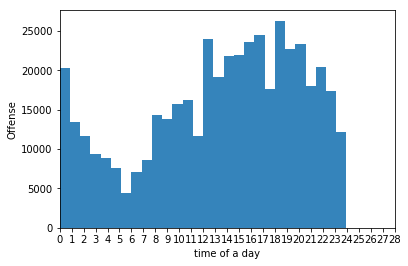

In [53]:
# make a histogram(longitude)
fig = plt.figure()
plt.hist(crimes_df['Time_float'], bins=28, alpha = 0.9)
plt.xlabel('time of a day')
plt.ylabel('Offense')
plt.xlim((0.4, 28))
plt.xticks( np.arange(0,29) )
plt.show()

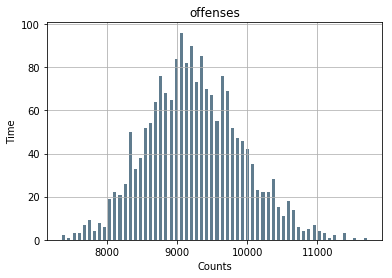

In [52]:
# Generate data on commute times.
size, scale = 1890, 440
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=60, rwidth=0.6,
                   color='#607c8e')
plt.title('offenses')
plt.xlabel('Counts')
plt.ylabel('Time')
plt.grid(axis='y', alpha=0.95)